In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
drive.mount('/content/drive')


file = '/content/drive/MyDrive/Dataset for Feature Selection for Drug Discovery/DrugDiscovery.csv'
df = pd.read_csv(file,delimiter=';')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,Orphan
0,CHEMBL4803817,NaN,NaN,Unknown,NaN,435.53,NaN,NaN,3.85,104.29,...,0.0,435.2270,-0.71,BASE,C24H29N5O3,CCOc1cc2c(cc1OCCCN)-c1c(c(Nc3cccc(C(=O)CC)n3)n...,BJXOSCFSLIDBPD-UHFFFAOYSA-N,InChI=1S/C24H29N5O3/c1-4-19(30)18-8-6-9-22(26-...,False,-1
1,CHEMBL3897759,NaN,NaN,Small molecule,NaN,544.65,2.0,3.0,5.75,73.39,...,2.0,544.2762,-2.03,NEUTRAL,C31H34F2N6O,Cc1ccc2c(NCc3ccc(NC(=O)C4CCN(Cc5ccc(F)c(F)c5)C...,ZSNPUIWMTSJNFC-UHFFFAOYSA-N,InChI=1S/C31H34F2N6O/c1-20-4-10-25-28(16-20)36...,False,-1
2,CHEMBL4802549,NaN,NaN,Unknown,NaN,623.32,NaN,NaN,8.45,30.93,...,2.0,622.3934,1.36,NEUTRAL,C38H54ClFN3O+,C[n+]1nn(Cc2c(F)cccc2Cl)c2c1C[C@]1(C)[C@H]3CC[...,BGUAPALSLUXHDG-QWWUAOIOSA-N,InChI=1S/C38H54ClFN3O/c1-33(2)16-18-38-19-17-3...,False,-1
3,CHEMBL1192150,NaN,NaN,Small molecule,NaN,163.22,NaN,NaN,1.65,46.25,...,0.0,163.0997,0.89,BASE,C10H13NO,Cc1ccc(O)c2c1CCC2N,UGWOTOVUNUJRNY-UHFFFAOYSA-N,InChI=1S/C10H13NO/c1-6-2-5-9(12)10-7(6)3-4-8(1...,False,-1
4,CHEMBL5028438,NaN,NaN,Unknown,NaN,337.40,NaN,NaN,5.37,51.81,...,1.0,337.1335,0.11,NEUTRAL,C23H17N2O+,Oc1cccc([C+](c2c[nH]c3ccccc23)c2c[nH]c3ccccc23)c1,XCROHEIWMKMZJK-UHFFFAOYSA-O,InChI=1S/C23H16N2O/c26-16-7-5-6-15(12-16)23(19...,False,-1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936974 entries, 0 to 1936973
Data columns (total 36 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   ChEMBL ID                        object 
 1   Name                             object 
 2   Synonyms                         object 
 3   Type                             object 
 4   Max Phase                        float64
 5   Molecular Weight                 float64
 6   Targets                          float64
 7   Bioactivities                    float64
 8   AlogP                            float64
 9   Polar Surface Area               float64
 10  HBA                              float64
 11  HBD                              float64
 12  #RO5 Violations                  float64
 13  #Rotatable Bonds                 float64
 14  Passes Ro3                       object 
 15  QED Weighted                     float64
 16  CX Acidic pKa                    float64
 17  CX Basic

In [7]:
print(df.columns)
print(df.shape)

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key',
       'Inchi', 'Withdrawn Flag', 'Orphan'],
      dtype='object')
(1936974, 36)


In [8]:
print(df.isnull().sum())

ChEMBL ID                                0
Name                               1900364
Synonyms                           1861865
Type                                 37110
Max Phase                          1928406
Molecular Weight                     10064
Targets                              96013
Bioactivities                        96013
AlogP                                60906
Polar Surface Area                   60906
HBA                                  60906
HBD                                  60906
#RO5 Violations                      60906
#Rotatable Bonds                     60906
Passes Ro3                           60906
QED Weighted                         60906
CX Acidic pKa                       862373
CX Basic pKa                        741629
CX LogP                              61148
CX LogD                              61148
Aromatic Rings                       60906
Structure Type                           0
Inorganic Flag                           0
Heavy Atoms

In [9]:
data = df.copy()

Non-numeric columns: Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Passes Ro3', 'Structure Type',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key',
       'Inchi'],
      dtype='object')
Non-numeric columns after conversion: Index(['ChEMBL ID', 'Name', 'Synonyms', 'Structure Type', 'Molecular Formula',
       'Smiles', 'Inchi Key', 'Inchi'],
      dtype='object')


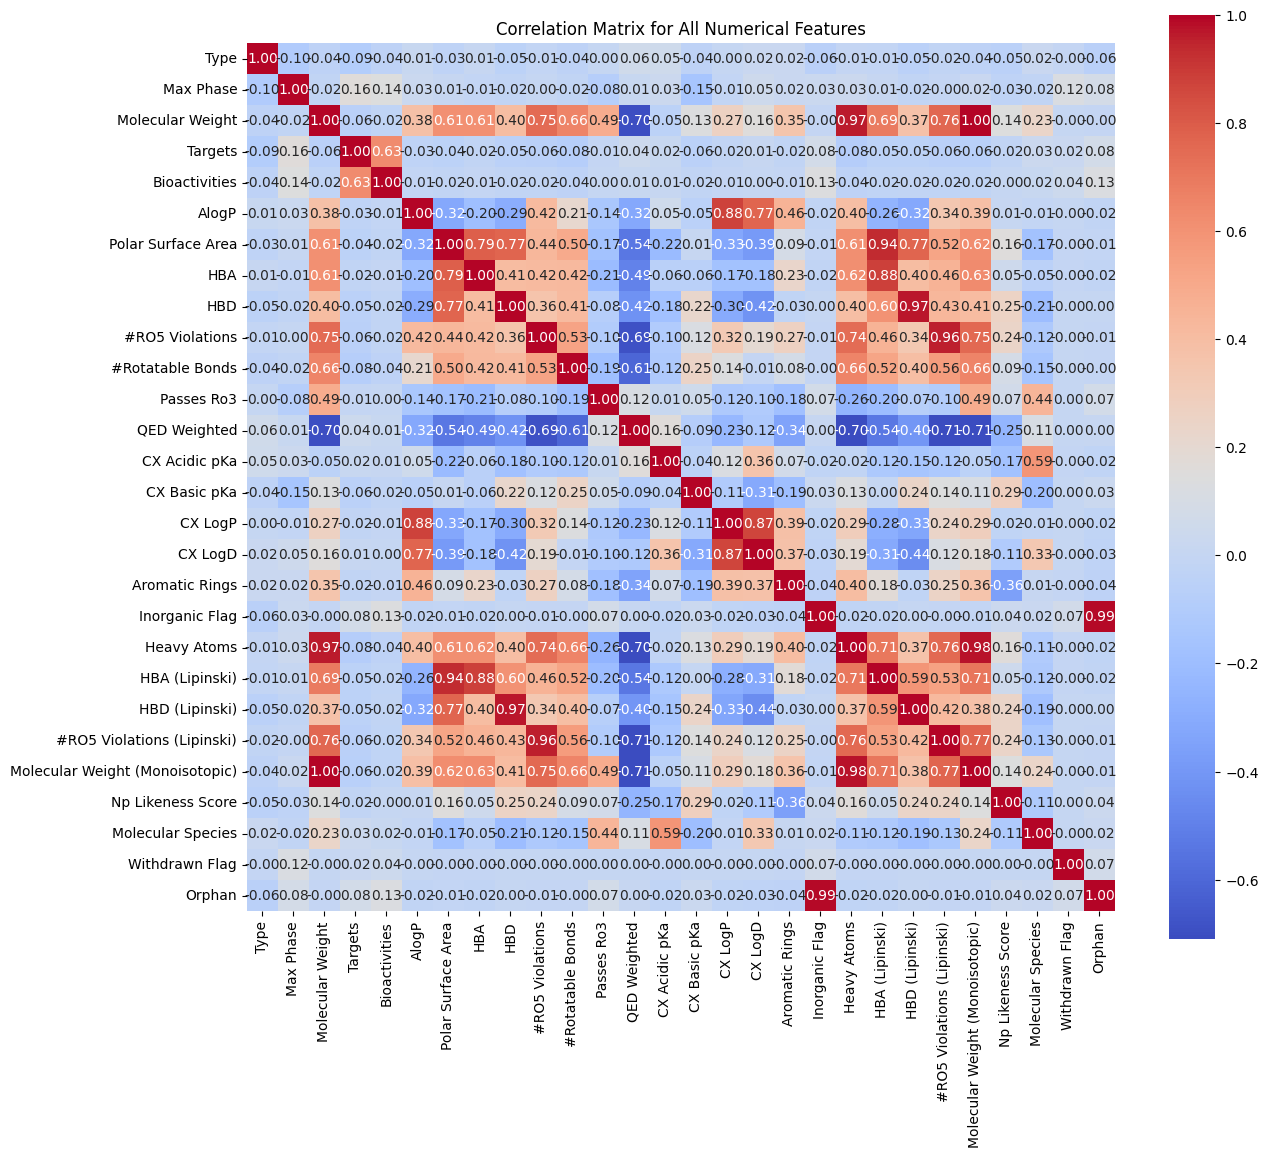

In [10]:
#Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

#Convert categorical columns to numeric using label encoding
convert_cols = ['Type','Withdrawn Flag','Molecular Species','Passes Ro3']
label_encoder = LabelEncoder()
for col in convert_cols:
  data[col]=label_encoder.fit_transform(data[col])

#Check again for non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns after conversion:", non_numeric_columns)

# Drop remaining non-numeric columns
data = data.select_dtypes(exclude=['object'])  # other categorical columns are not required

# Calculate the correlation matrix for all numeric columns
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix for All Numerical Features")
plt.show()

Taking Sample data of 1lac rows from the whole dataset of 20 lac rows. Shuffling dataset before taking the sample.

In [11]:
#  Set the random seed for reproducibility
random_seed = 42
shuffled_indices = np.random.permutation(len(data))

# shuffle the DataFrame
data = data.iloc[shuffled_indices].reset_index(drop=True)
# Sample a subset of rows from the DataFrame
sample_size = 100000  # sampling 1,00,000 rows

# Ensure the sample size is less than the number of rows in the dataset
if sample_size < len(data):
    sampled_data = data.sample(n=sample_size, random_state=random_seed)
else:
    sampled_data = data  # If the dataset is smaller than the sample size


# Check the shape of the sampled DataFrame
print(f"Sampled DataFrame shape: {sampled_data.shape}")

Sampled DataFrame shape: (100000, 28)


In [12]:
sampled_data.columns

Index(['Type', 'Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities',
       'AlogP', 'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)', 'HBD (Lipinski)',
       '#RO5 Violations (Lipinski)', 'Molecular Weight (Monoisotopic)',
       'Np Likeness Score', 'Molecular Species', 'Withdrawn Flag', 'Orphan'],
      dtype='object')

In [13]:
print(sampled_data.isnull().sum())

Type                                   0
Max Phase                          99547
Molecular Weight                     518
Targets                             4953
Bioactivities                       4953
AlogP                               3168
Polar Surface Area                  3168
HBA                                 3168
HBD                                 3168
#RO5 Violations                     3168
#Rotatable Bonds                    3168
Passes Ro3                             0
QED Weighted                        3168
CX Acidic pKa                      44647
CX Basic pKa                       38313
CX LogP                             3182
CX LogD                             3182
Aromatic Rings                      3168
Inorganic Flag                         0
Heavy Atoms                         3168
HBA (Lipinski)                      3168
HBD (Lipinski)                      3168
#RO5 Violations (Lipinski)          3168
Molecular Weight (Monoisotopic)      518
Np Likeness Scor

# **Handling missing values**


In [14]:
sampled_data=sampled_data.drop('Max Phase',axis=1) #droping max phase column as it has most of the null values.

In [15]:
print("Unique values of Target column:",sampled_data['Targets'].unique())
print("Unique values of Type column:",sampled_data['Type'].unique())
print("Unique values of Bioactivities column:",sampled_data['Bioactivities'].unique())

Unique values of Target column: [  2.   3.   1.  nan   6.   4.  30.   5.  14.   8.  21.  16.  13.   7.
  15.  19.  60.  27.  12.  55.  28.   9.  18.  26.  10.  11.  17.  42.
  68.  22.  52.  20.  57.  54.  59.  56.  31.  35.  23.  43.  66.  29.
  51.  58.  53.  45. 109.  24.  76.  40.  25.  46.  34.  41.  67.  44.
  64.  92.  47.  78.  48.  77.  62.  32.  49.  72.  70.  33.  50.  69.
  79.  39.  65. 111.  36.  61.  38.  85. 145.  80.  37.  96.  75.  63.
 113. 134.  86. 306.  90. 369.  81.  88. 207. 274. 150.  94. 172.  82.
  91. 139. 122. 284. 127. 144. 205. 197. 252. 135.  73. 131. 152. 204.
 104. 146. 409. 130.  74. 106. 132. 489. 242. 209. 176. 355. 260. 101.
 105. 241. 206. 138. 128. 208. 256. 137.  71. 424. 175. 248. 497. 108.
  97. 372. 944. 107. 283. 100.  83. 926.  84. 289.  93. 388. 102. 280.
 220. 226. 225.  87. 147. 323.  95.  99. 448. 133. 124. 193. 305.]
Unique values of Type column: [ 8  9  7 10  0  6  5  3  4]
Unique values of Bioactivities column: [2.000e+00 4.000e+00  

In [16]:
data['Targets'].fillna(sampled_data['Targets'].mean(), inplace=True)
data['Bioactivities'].fillna(sampled_data['Bioactivities'].mean(), inplace=True)
print("Missing values in Targets after imputation:",data['Targets'].isnull().sum())
print("Missing values in Bioactivities after imputation:",data['Bioactivities'].isnull().sum())

Missing values in Targets after imputation: 0
Missing values in Bioactivities after imputation: 0


<ipython-input-16-06e50f2f26d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Targets'].fillna(sampled_data['Targets'].mean(), inplace=True)
<ipython-input-16-06e50f2f26d8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [17]:
for col in sampled_data.columns:
  sampled_data[col].fillna(sampled_data[col].mean(),inplace=True)
sampled_data.isnull().sum()

<ipython-input-17-6db014de94b8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampled_data[col].fillna(sampled_data[col].mean(),inplace=True)


,0
Type,0
Molecular Weight,0
Targets,0
Bioactivities,0
AlogP,0
Polar Surface Area,0
HBA,0
HBD,0
#RO5 Violations,0
#Rotatable Bonds,0


# Correlation of sampled data after mean imputation

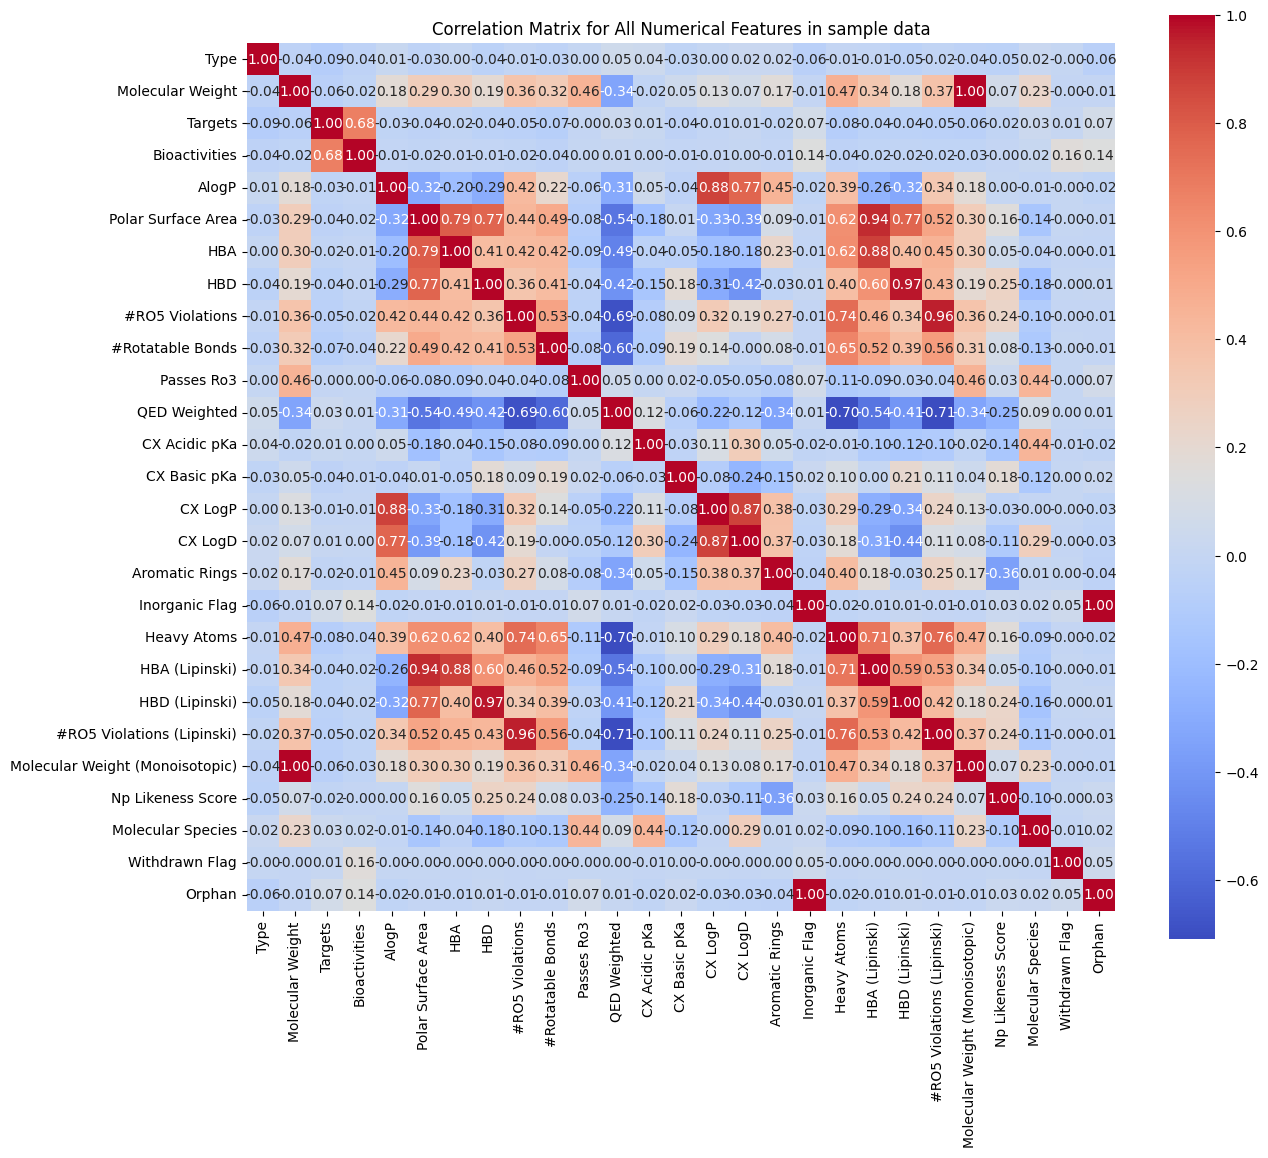

In [18]:

correlation_matrix = sampled_data.corr()

# Step 6: Visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix for All Numerical Features in sample data")
plt.show()

Correlation matrix of original dataset and sampled dataset(after mean imputation) are similar so we will go ahead with the same.


Standardize Data


In [19]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(sampled_data)
sampled_data_scaled = scaler.transform(sampled_data)
print(sampled_data_scaled)

[[-0.32003542 -0.16463713 -0.33608747 ...  0.29629343 -0.00316229
  -0.06738406]
 [-0.32003542  0.0441451  -0.25458992 ... -2.10732004 -0.00316229
  -0.06738406]
 [-0.32003542 -0.22302341 -0.41758501 ... -0.9055133  -0.00316229
  -0.06738406]
 ...
 [-0.32003542 -0.47877776 -0.17309237 ...  0.29629343 -0.00316229
  -0.06738406]
 [-0.32003542 -0.21520762  0.47888803 ...  0.29629343 -0.00316229
  -0.06738406]
 [ 1.98006105 -0.38173814 -0.41758501 ...  0.29629343 -0.00316229
  -0.06738406]]


# **Principle component Analysis**

In [20]:
n_components = 15 #setting max components
pca = PCA(n_components=n_components)
sampled_data_pca = pca.fit_transform(sampled_data_scaled)
print(sampled_data_pca.shape)

(100000, 15)


In [21]:
#calculate explained and cumulative variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component:",explained_variance)

pca_cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:",pca_cumulative_explained_variance)

Explained variance ratio for each component: [0.25233646 0.151666   0.08465235 0.07832828 0.06333655 0.05726192
 0.04429223 0.037554   0.03584926 0.03534296 0.03040816 0.02359157
 0.02233556 0.01898181 0.01395443]
Cumulative explained variance: [0.25233646 0.40400246 0.48865482 0.5669831  0.63031965 0.68758156
 0.73187379 0.76942779 0.80527705 0.84062001 0.87102817 0.89461974
 0.9169553  0.93593711 0.94989154]


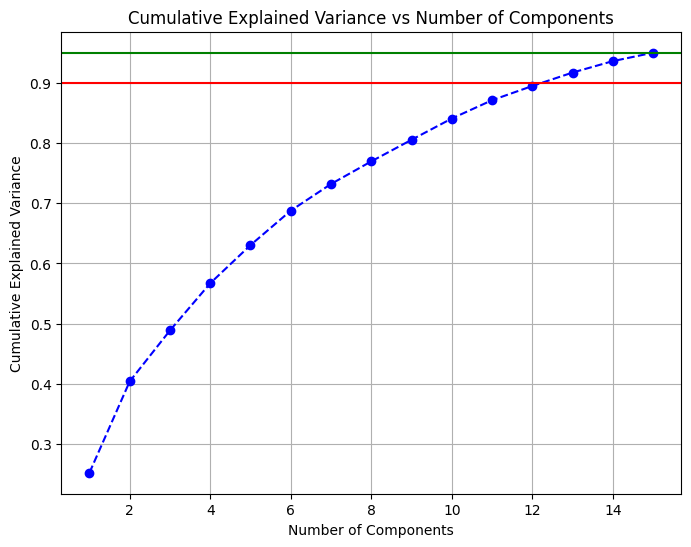

Number of components explaining 90% variance: 13


In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_cumulative_explained_variance) + 1), pca_cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-')  # line for 90% threshold
plt.axhline(y=0.95, color='g', linestyle='-')  # line for 95% threshold
plt.title('Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# number of components that explain 90% and 95% variance
pca_components_90 = np.argmax(pca_cumulative_explained_variance >= 0.90) + 1

print(f"Number of components explaining 90% variance: {pca_components_90}")


# **Linear Descriminant Analysis**

In [23]:
# Initialize LDA
lda = LDA(n_components=None) # None lets LDA choose the maximum possible components

In [24]:
# Fit LDA
X_lda = lda.fit_transform(sampled_data_scaled, sampled_data['Type'])

# explained variance ratio for each component
lda_explained_variance_ratio = lda.explained_variance_ratio_
lda_cumulative_variance_ratio = lda_explained_variance_ratio.cumsum()
print(lda_explained_variance_ratio)
print(lda_cumulative_variance_ratio)

[1.00000000e+00 9.42990036e-26 2.99679365e-26 1.71265814e-26
 6.24763618e-27 1.86315220e-28 7.69675325e-30 1.03552839e-56]
[1. 1. 1. 1. 1. 1. 1. 1.]


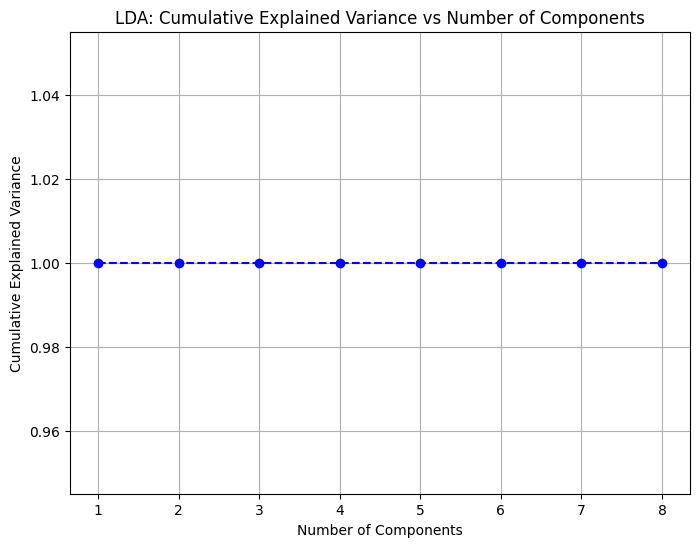

Number of components explaining 90% variance: 1


In [25]:
# cumulative explained variance to decide on the number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(lda_cumulative_variance_ratio)+1), lda_cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('LDA: Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Check how many components explain the desired variance
lda_n_components_90_variance = next(i for i, total in enumerate(lda_cumulative_variance_ratio) if total >= 0.90)
print(f"Number of components explaining 90% variance: {lda_n_components_90_variance + 1}")

In [26]:
components_90_lda = np.argmax(lda_cumulative_variance_ratio >= 0.90) + 1
print(f"LDA - Components for 90% variance: {components_90_lda}")

LDA - Components for 90% variance: 1


# **Independent Component Analysis**

In [27]:
from sklearn.decomposition import FastICA


In [28]:
# Set the number of ICA components to match the 90% variance from PCA or LDA
#n_ica_components = pca_components_90

# Initialize ICA
ica = FastICA(n_components, random_state=random_seed)

# Fit and transform data
sampled_data_ica = ica.fit_transform(sampled_data_scaled)
print("Shape of data after ICA:", sampled_data_ica.shape)


Shape of data after ICA: (100000, 15)


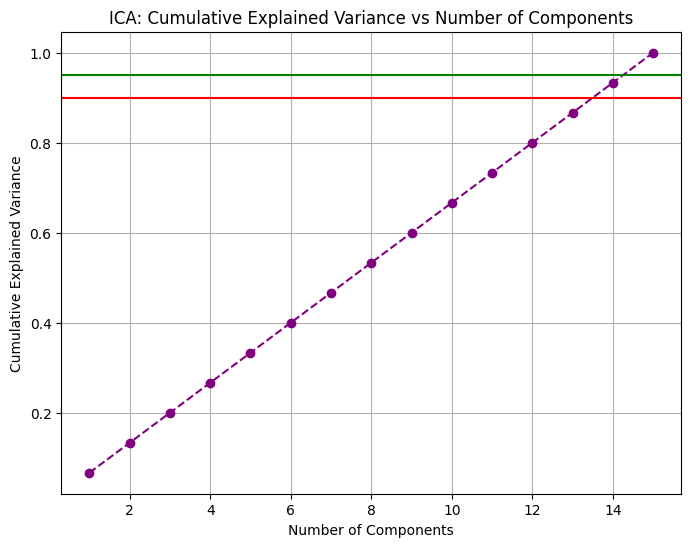

Number of ICA components explaining 90% variance: 14
Number of ICA components explaining 95% variance: 15


In [29]:
# Variance analysis for ICA components
# Calculate the variance of each component
ica_variance = np.var(sampled_data_ica, axis=0)
cumulative_ica_variance = np.cumsum(ica_variance) / np.sum(ica_variance)

# Plot the cumulative explained variance for ICA components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_ica_variance) + 1), cumulative_ica_variance, marker='o', linestyle='--', color='purple')
plt.axhline(y=0.90, color='r', linestyle='-')  # line for 90% threshold
plt.axhline(y=0.95, color='g', linestyle='-')  # line for 95% threshold
plt.title('ICA: Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Number of components that explain 90% and 95% of the variance
components_90_ica = np.argmax(cumulative_ica_variance >= 0.90) + 1
components_95_ica = np.argmax(cumulative_ica_variance >= 0.95) + 1
print(f"Number of ICA components explaining 90% variance: {components_90_ica}")
print(f"Number of ICA components explaining 95% variance: {components_95_ica}")


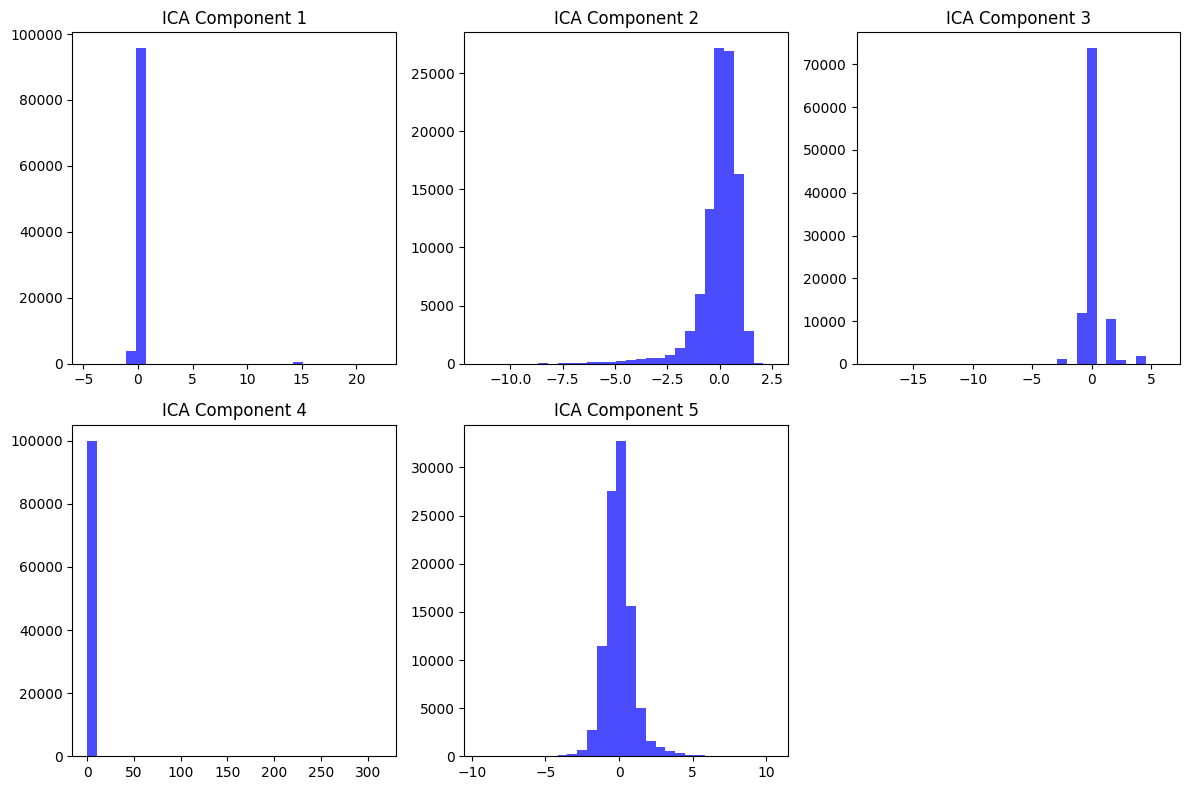

In [30]:
# Plotting the first few ICA components
plt.figure(figsize=(12, 8))
for i in range(min(components_90_ica,5)):  # Plotting first few components
    plt.subplot(2, 3, i + 1)
    plt.hist(sampled_data_ica[:, i], bins=30, color='blue', alpha=0.7)
    plt.title(f'ICA Component {i + 1}')
plt.tight_layout()
plt.show()


# **Comparison between PCA,LDA and ICA**

In [31]:
print("\nSummary of Dimensionality Reduction Techniques:")
print(f"PCA: Number of components explaining 90% variance - {pca_components_90}")
print(f"LDA: Number of components explaining 90% variance - {components_90_lda}")
print(f"ICA: Number of components explaining 90% variance - {components_90_ica}")



Summary of Dimensionality Reduction Techniques:
PCA: Number of components explaining 90% variance - 13
LDA: Number of components explaining 90% variance - 1
ICA: Number of components explaining 90% variance - 14


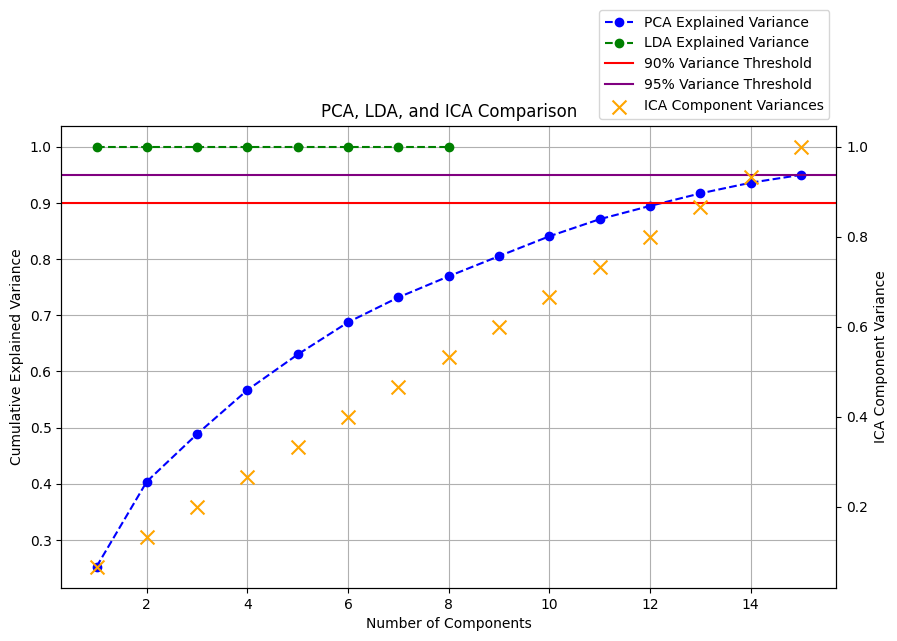

In [32]:

# Create a figure with two y-axes: one for cumulative variance (PCA/LDA) and one for ICA component distributions
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot cumulative explained variance for PCA and LDA
ax1.plot(range(1, len(pca_cumulative_explained_variance) + 1), pca_cumulative_explained_variance, marker='o', linestyle='--', color='b', label='PCA Explained Variance')
ax1.plot(range(1, len(lda_cumulative_variance_ratio) + 1), lda_cumulative_variance_ratio, marker='o', linestyle='--', color='g', label='LDA Explained Variance')

# Add horizontal lines for 90% and 95% thresholds
ax1.axhline(y=0.90, color='r', linestyle='-', label='90% Variance Threshold')
ax1.axhline(y=0.95, color='purple', linestyle='-', label='95% Variance Threshold')

# Set labels and title for cumulative variance plot
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Cumulative Explained Variance')
ax1.set_title('PCA, LDA, and ICA Comparison')

ax1.grid(True)

# Secondary y-axis for ICA components
ax2 = ax1.twinx()

ica_components = range(1, len(cumulative_ica_variance) + 1)  # Component indices

# Plot ICA component variances as points on the secondary axis
ax2.scatter(ica_components, cumulative_ica_variance, color='orange', label='ICA Component Variances', marker='x', s=100)
ax2.set_ylabel('ICA Component Variance')

# Add a legend for the ICA plot
fig.legend(loc="lower right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.show()
